In [3]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_optimal_500.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
data


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,optimal_policy,optimal_outcome_policy
0,2758.583786,2928.739839,2710.556882,66,4066.350544,88,3504.939130
1,3080.634350,3513.963668,2530.810135,66,4449.930195,88,3501.801837
2,3849.241803,3795.950639,3368.870548,29,4348.424224,36,4060.950011
3,3226.087554,3358.558738,2764.454110,29,4261.068828,25,3220.646968
4,3447.789650,3351.477990,3180.469780,29,4424.626732,97,3583.248661
5,3116.846481,3662.979464,2944.152469,88,4444.566679,25,3242.537825
6,3554.336203,3201.055313,2761.360876,29,3807.644135,97,3264.304703
7,2964.626275,3130.561662,3039.202842,28,4226.282096,29,3905.908499
8,3639.089522,3359.212493,2887.056072,29,4416.079028,29,3457.614571
9,3394.223837,3899.266309,3160.075259,66,4456.590973,29,3671.253668


/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

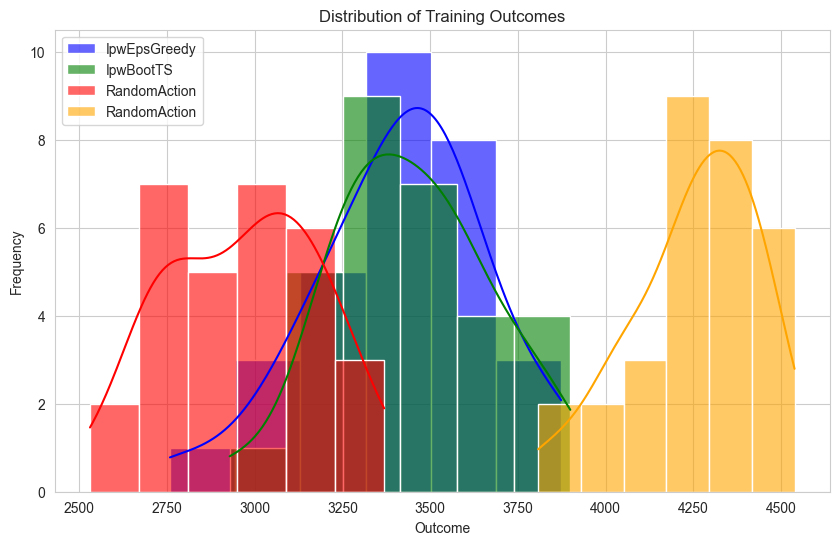

(-0.5121221361454709, 0.6105101658297465)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set the style of the visualizations
sns.set_style("whitegrid")

# Plot the distributions of both methods
plt.figure(figsize=(10, 6))
sns.histplot(data['IpwEpsGreedy'], color="blue", kde=True, label='IpwEpsGreedy', alpha=0.6)
sns.histplot(data['IpwBootTS'], color="green", kde=True, label='IpwBootTS', alpha=0.6)
sns.histplot(data['RandomAction'], color="red", kde=True, label='RandomAction', alpha=0.6)
sns.histplot(data['optimal_outcome_actions'], color="orange", kde=True, label='RandomAction', alpha=0.6)
sns.histplot(data['optimal_outcome_policy'], color="pink", kde=True, label='RandomAction', alpha=0.6)

plt.title('Distribution of Training Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Conduct a two-sample t-test to compare the means
t_stat, p_value = ttest_ind(data['IpwEpsGreedy'], data['IpwBootTS'])

t_stat, p_value
